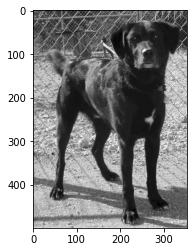

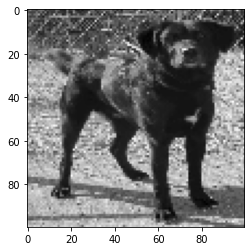

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os

datadir = "datasets/PetImages"
categories = ["Dog", "Cat"]

for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break
# print(img_array.shape)


IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [5]:
# Training data
IMG_SIZE = 100
training_data = []

def create_trainig_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in tqdm(os.listdir(path)): # tqdm is for progress bar
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_trainig_data()
print(len(training_data))          

100%|██████████| 12486/12486 [00:18<00:00, 681.84it/s]

24916


In [6]:
import random
random.shuffle(training_data)

for sample in training_data[0:10]:
    print(sample[1]) # class is mixed


1
0
0
1
0
1
0
1
1
1


In [7]:
# Make model
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)

print(x[0])
print(x[0].reshape(-1,IMG_SIZE,IMG_SIZE,1))
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

[[ 68  76  72 ... 219 234 236]
 [ 70  67  75 ... 231 235 206]
 [ 47  65  88 ... 228 242 234]
 ...
 [ 86  25  22 ... 115 127 114]
 [ 53  26  22 ... 114 160 160]
 [ 40  19  22 ... 112 159 157]]
[[[[ 68]
   [ 76]
   [ 72]
   ...
   [219]
   [234]
   [236]]

  [[ 70]
   [ 67]
   [ 75]
   ...
   [231]
   [235]
   [206]]

  [[ 47]
   [ 65]
   [ 88]
   ...
   [228]
   [242]
   [234]]

  ...

  [[ 86]
   [ 25]
   [ 22]
   ...
   [115]
   [127]
   [114]]

  [[ 53]
   [ 26]
   [ 22]
   ...
   [114]
   [160]
   [160]]

  [[ 40]
   [ 19]
   [ 22]
   ...
   [112]
   [159]
   [157]]]]


In [9]:
import pickle

pickle_out = open("datasets/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("datasets/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

pickle_in = open("datasets/x.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("datasets/y.pickle","rb")
y = pickle.load(pickle_in)

